In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import rcParams

from integration_tools import create_sweeps, linear_segments, integrate

rcParams['agg.path.chunksize'] = 101

In [2]:
ds = xr.open_dataset('SKR_poly_flux/poly_flux_combined.ncdf', engine='netcdf4')  # This file is all the masked polygon flux from all years combined together, yearly files generated from get_polygon_flux.ipynb
ds = ds.rename({'__xarray_dataarray_variable__': 'flux'})  # Rename flux values to flux

In [3]:
df = ds.to_dataframe().reset_index()
create_sweeps(df, time='time')

Linear Dataframe (intermediate step)

In [6]:
#df_lin = linear_segments(df, time='time', frequency='frequency', flux='flux', preserve_cols=['time'])
#df_lin.to_csv('df_lin_poly.csv')
#df_lin = pd.read_csv('df_lin_poly.csv')

Integrated Power DataFrame

In [5]:
#df_int = integrate(df_lin, flimits=(0, 1500))
#df_int.to_csv('df_int.csv')
df_int = pd.read_csv('df_int_poly.csv')

Merged Dataframe

In [6]:
df = df.merge(df_int, on='SWEEP')

In [7]:
time_series = df["time"].to_numpy()
integral = df["integral_0_1500"].to_numpy()
integral[integral == 0] = np.nan

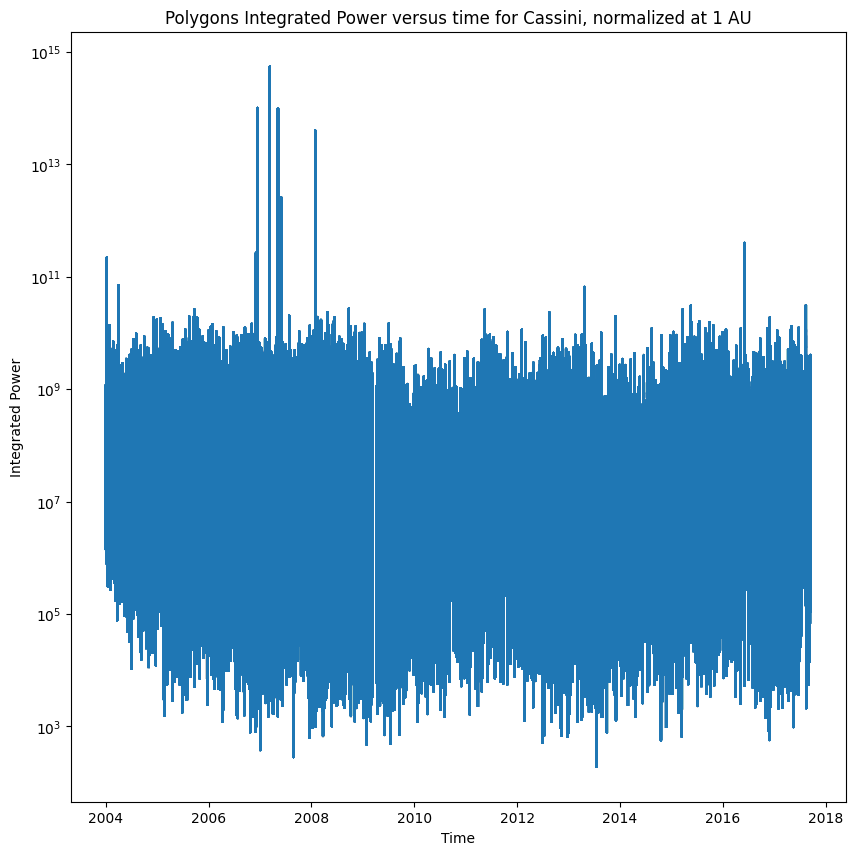

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.plot(time_series, integral)
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Integrated Power')
ax.set_title('Polygons Integrated Power versus time for Cassini, normalized at 1 AU');